In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
import csv
import seaborn as sns
%matplotlib inline

In [38]:
#Read csv
general_df = pd.read_csv('final_zillow_info.csv').dropna() #dropping NAN from all the data in the table
general_df.head()

,Address,Zip,Zillow ID,Tax,Tax_Year,Home Type,Home Size,Bathrooms,Bedrooms,Last Sold Date,Last Sold Price,Zestimate Amount,Zestimate Date,Zestimate Value Change
0,5 14th,60605,60204228.0,248760.0,2017.0,Condominium,10593.0,2.0,2.0,05/27/2004,295000.0,395223.0,04/03/2019,48923.0
8,23 E 13th St 606,60605,70474983.0,513000.0,2017.0,Condominium,78844.0,2.0,2.0,07/20/2012,525000.0,657483.0,04/03/2019,-597.0
9,125 E 13th St,60605,70474811.0,490400.0,2017.0,Condominium,23332.0,2.0,2.0,04/17/2013,565000.0,645588.0,04/03/2019,-24410.0
11,125 E 13th St 1002,60605,70474919.0,28050.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,36498.0,04/03/2019,96.0
12,125 E 13th St 1003,60605,70474751.0,321140.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,410062.0,04/03/2019,14320.0


In [52]:
condo_df = general_df.loc[general_df['Home Type']=='Condominium'] #creates a df for 'Condo' only
print(len(condo_df))
condo_df.head()

5615


,Address,Zip,Zillow ID,Tax,Tax_Year,Home Type,Home Size,Bathrooms,Bedrooms,Sold Date,Sold Price,Current Estimated Value,Estimated Date,Estimated Value Change
0,5 14th,60605,60204228.0,248760.0,2017.0,Condominium,10593.0,2.0,2.0,05/27/2004,295000.0,395223.0,04/03/2019,48923.0
8,23 E 13th St 606,60605,70474983.0,513000.0,2017.0,Condominium,78844.0,2.0,2.0,07/20/2012,525000.0,657483.0,04/03/2019,-597.0
9,125 E 13th St,60605,70474811.0,490400.0,2017.0,Condominium,23332.0,2.0,2.0,04/17/2013,565000.0,645588.0,04/03/2019,-24410.0
11,125 E 13th St 1002,60605,70474919.0,28050.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,36498.0,04/03/2019,96.0
12,125 E 13th St 1003,60605,70474751.0,321140.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,410062.0,04/03/2019,14320.0


In [53]:
# CHANGE COLUMN NAME
condo_df = condo_df.rename(columns={"Tax_Year":"Tax Year","Last Sold Date":"Sold Date","Last Sold Price":"Sold Price",
                                    "Zestimate Amount": "Current Estimated Value",
                                    "Zestimate Date":"Estimated Date",
                                    "Zestimate Value Change":"Estimated Value Change"})
condo_df.head()

,Address,Zip,Zillow ID,Tax,Tax Year,Home Type,Home Size,Bathrooms,Bedrooms,Sold Date,Sold Price,Current Estimated Value,Estimated Date,Estimated Value Change
0,5 14th,60605,60204228.0,248760.0,2017.0,Condominium,10593.0,2.0,2.0,05/27/2004,295000.0,395223.0,04/03/2019,48923.0
8,23 E 13th St 606,60605,70474983.0,513000.0,2017.0,Condominium,78844.0,2.0,2.0,07/20/2012,525000.0,657483.0,04/03/2019,-597.0
9,125 E 13th St,60605,70474811.0,490400.0,2017.0,Condominium,23332.0,2.0,2.0,04/17/2013,565000.0,645588.0,04/03/2019,-24410.0
11,125 E 13th St 1002,60605,70474919.0,28050.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,36498.0,04/03/2019,96.0
12,125 E 13th St 1003,60605,70474751.0,321140.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,410062.0,04/03/2019,14320.0


In [7]:
#sold $ vs current value
number_1_bedroom = 

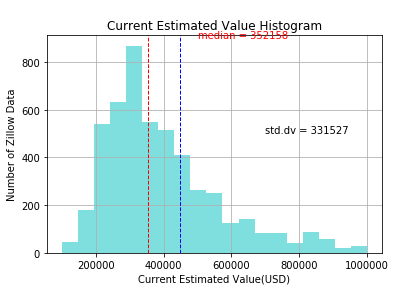

In [43]:
#Histgram 
#Calc mean, median, std dev
mean = condo_df['Current Estimated Value'].mean()
median = condo_df['Current Estimated Value'].median()
std = condo_df['Current Estimated Value'].std()
mean_round = 'mean = ' + str(round(mean))
median_round = 'median = ' + str(round(median))
std_round = 'std.dv = ' + str(round(std))

condo_df_hist_amount = condo_df.drop([0]).hist(['Current Estimated Value'],range=(100000,1000000),bins=19,alpha=0.5,color='c')
plt.axvline(mean, color='b', linestyle='dashed', linewidth=1)
plt.axvline(median, color='r', linestyle='dashed', linewidth=1)
plt.annotate(mean_round,xy=(500000,1000),color='b')
plt.annotate(median_round,xy=(500000,900),color='r')
plt.annotate(std_round,xy=(700000,500),color='k')
plt.xlabel('Current Estimated Value(USD)')
plt.ylabel('Number of Zillow Data')
plt.title('Current Estimated Value Histogram')
plt.savefig("Images/histogram1.png")

In [44]:
#Clean data for Increase% Histgram
condo_df['Amount 30days before'] = condo_df['Current Estimated Value']-condo_df['Estimated Value Change']
condo_df['Increase% for 30days'] = condo_df['Estimated Value Change']/condo_df['Amount 30days before']
# Increase_df = general_df.dropna(subset=['Increase% for 30days']).map('{:,.2%}'.format)

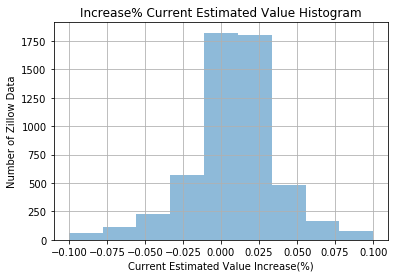

In [45]:
# Show Increase% Histgram
condo_df_hist_increase = condo_df.drop([0]).hist(['Increase% for 30days'],range=(-0.1,0.1),bins=9,alpha=0.5)
plt.xlabel('Current Estimated Value Increase(%)')
plt.ylabel('Number of Zillow Data')
plt.title('Increase% Current Estimated Value Histogram')
plt.savefig("Images/histogram2.png")
#plt.show()

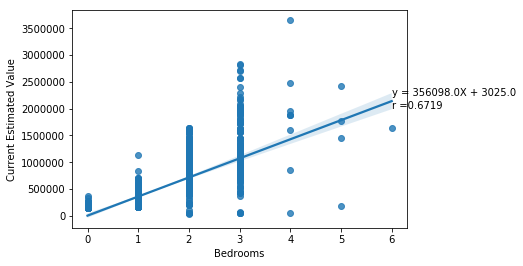

In [46]:
# Calc correlation between Zestimate amount vs Bedrooms
condo_df_zip1 = condo_df.loc[general_df['Zip']==60601]

# Calc r
r = np.corrcoef (condo_df_zip1['Bedrooms'], condo_df_zip1['Current Estimated Value'])[1,0]
r_round = 'r =' + str(r.round(4))

# Calc Linear function
myXset = np.array(condo_df_zip1['Bedrooms'])
myYset = np.array(condo_df_zip1['Current Estimated Value'])
coefficient = np.polyfit(myXset, myYset, 1)
Y_func = np.poly1d(coefficient)
linear = 'y = ' + str(coefficient[0].round(0)) + 'X + ' + str(coefficient[1].round())
linear

# Show scatter
sns.regplot(x='Bedrooms',y='Current Estimated Value',data=condo_df_zip1,truncate=True)
plt.annotate(linear,xy=(6,2250000))
plt.annotate(r_round,xy=(6,2000000))
plt.savefig("Images/scatter.png")

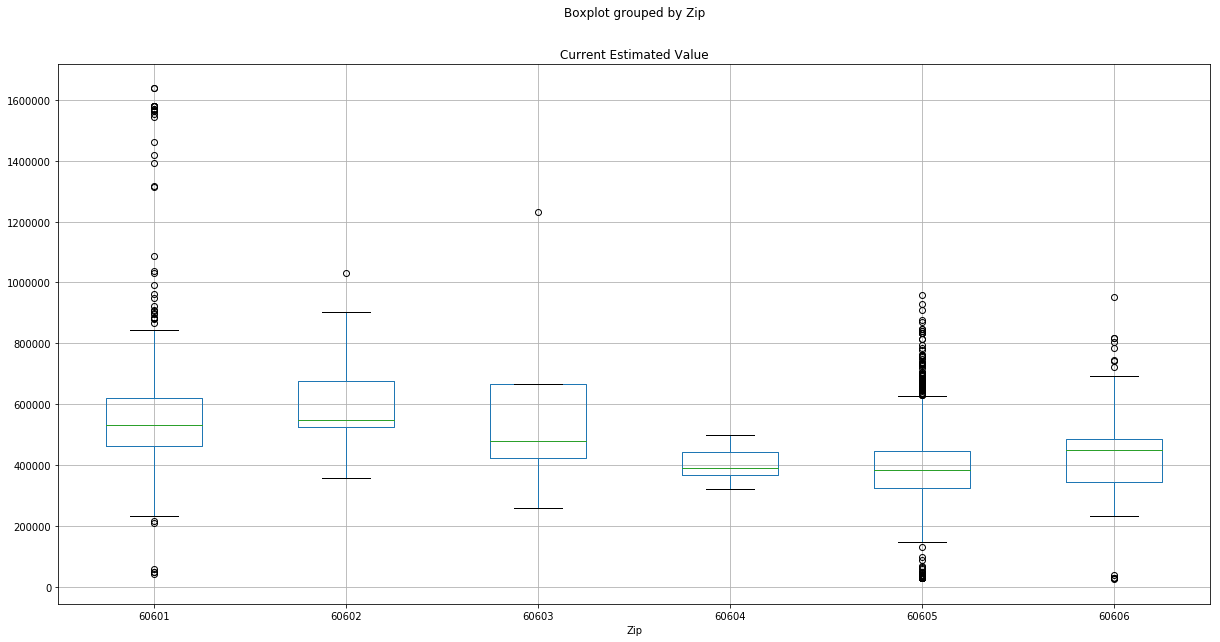

In [47]:
# only focus on 2bed/2bath to see the variance of amount by zip
Boxplot = condo_df.loc[condo_df['Bedrooms']==2].loc[condo_df['Bathrooms']==2]
Boxplot.boxplot('Current Estimated Value',by="Zip",figsize=(20, 10))
plt.savefig("Images/boxplot.png")